<a href="https://colab.research.google.com/github/PRAVEEN-tech777/Housing_Prediction/blob/main/house_price_predicition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**House Price Prediction**

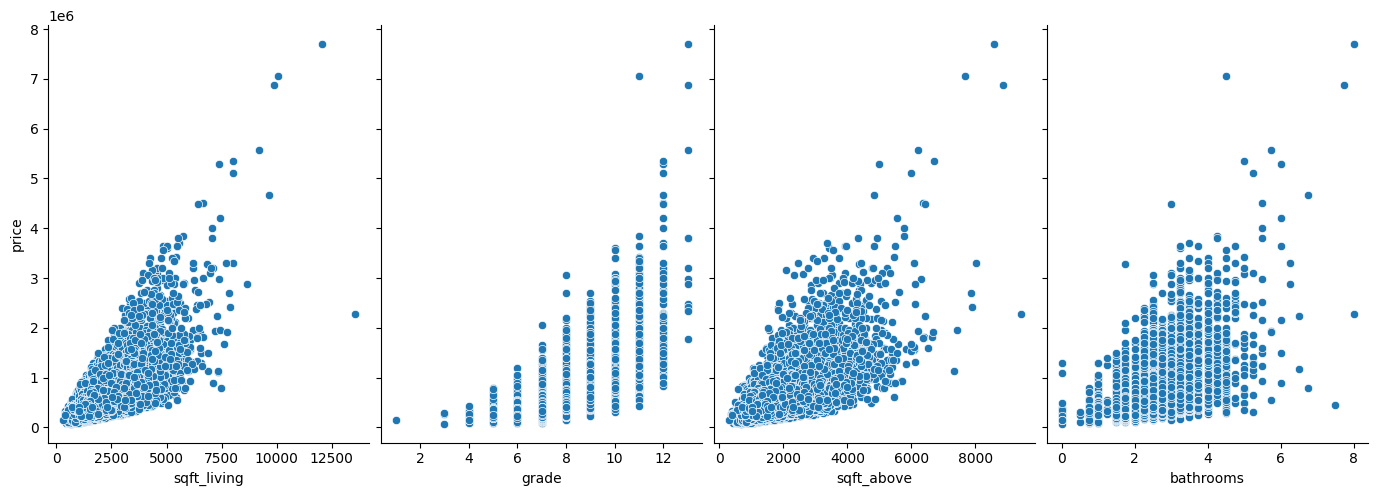

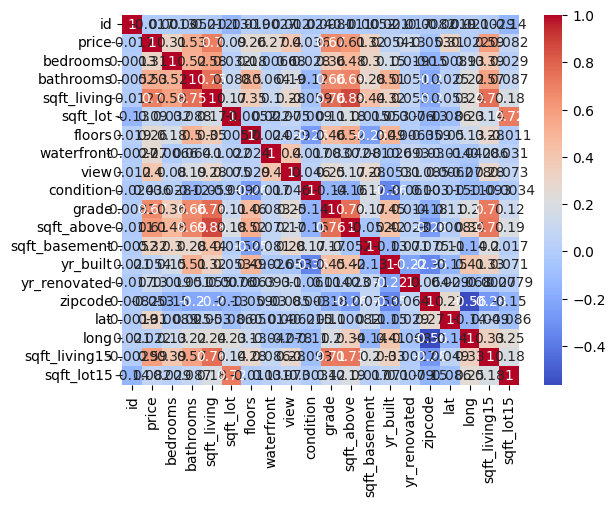

Mean Squared Error: 63267463441.37423
R-squared: 0.5391757296248991
Mean Squared Error (Tuned): 63267463441.37423
R-squared (Tuned): 0.5391757296248991


In [ ]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Load data
data = pd.read_csv('/content/kc_house_data.csv')

# Data Preprocessing
data = data.dropna() # Drop missing values
X = data[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15']] # Features
y = data['price'] # Target variable

# EDA
sns.pairplot(data, x_vars=['sqft_living', 'grade', 'sqft_above', 'bathrooms'], y_vars='price', height=5, aspect=0.7)
plt.show()

# Feature Selection
corr = data.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()
selected_features = ['sqft_living', 'grade', 'sqft_above', 'bathrooms']
X = X[selected_features]

# Model Selection
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

# Model Evaluation
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('R-squared:', r2_score(y_test, y_pred))

# Model Tuning
from sklearn.model_selection import GridSearchCV
params = {'fit_intercept':[True,False],'copy_X':[True,False]}
grid = GridSearchCV(lr, param_grid=params, cv=5)
grid.fit(X_train, y_train)
best_lr = grid.best_estimator_
y_pred_tuned = best_lr.predict(X_test)

# Final Model Evaluation
print('Mean Squared Error (Tuned):', mean_squared_error(y_test, y_pred_tuned))
print('R-squared (Tuned):', r2_score(y_test, y_pred_tuned))
